In [1]:
import pandas as pd
from sklearn import datasets
import xlwings as xw
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns=iris['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [5]:
for i in range(len(iris['target_names'])):
    iris_df.loc[iris_df['target']==i, 'target'] = iris['target_names'][i]

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
xw.view(iris_df)

In [8]:
iris_df['target'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


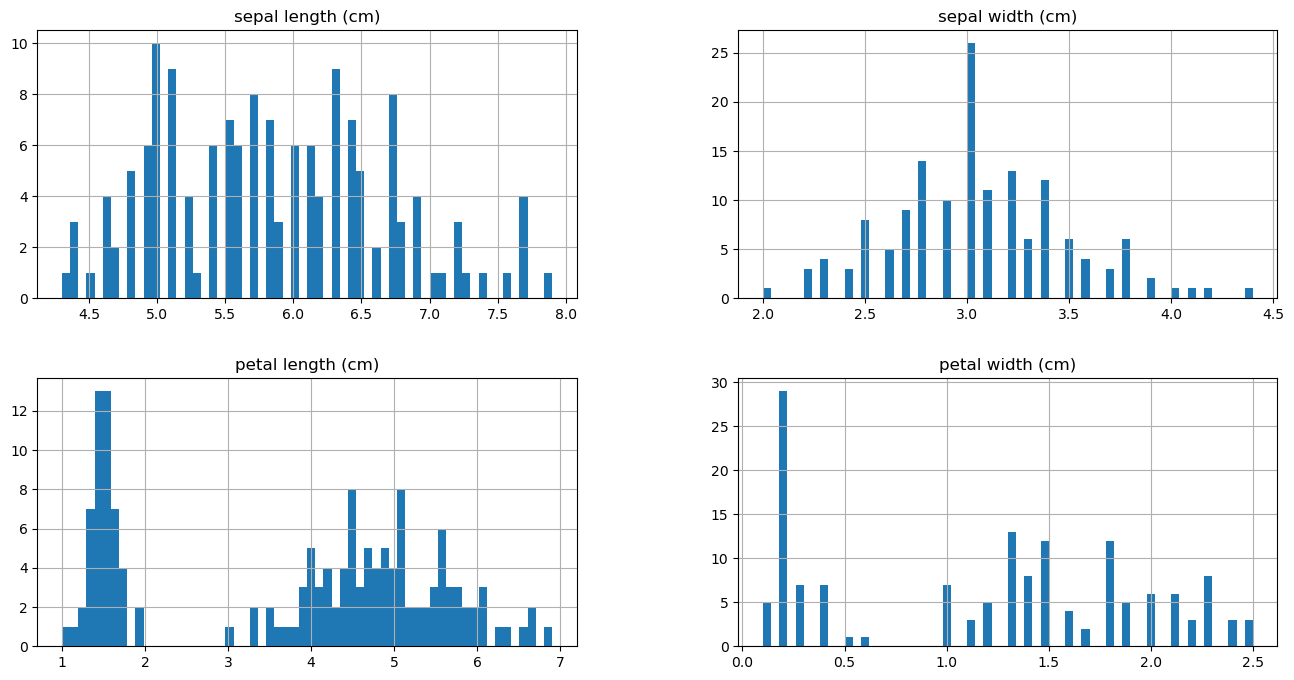

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
iris_df.hist(bins=60,figsize=(16,8))
plt.show()

array([[<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='p

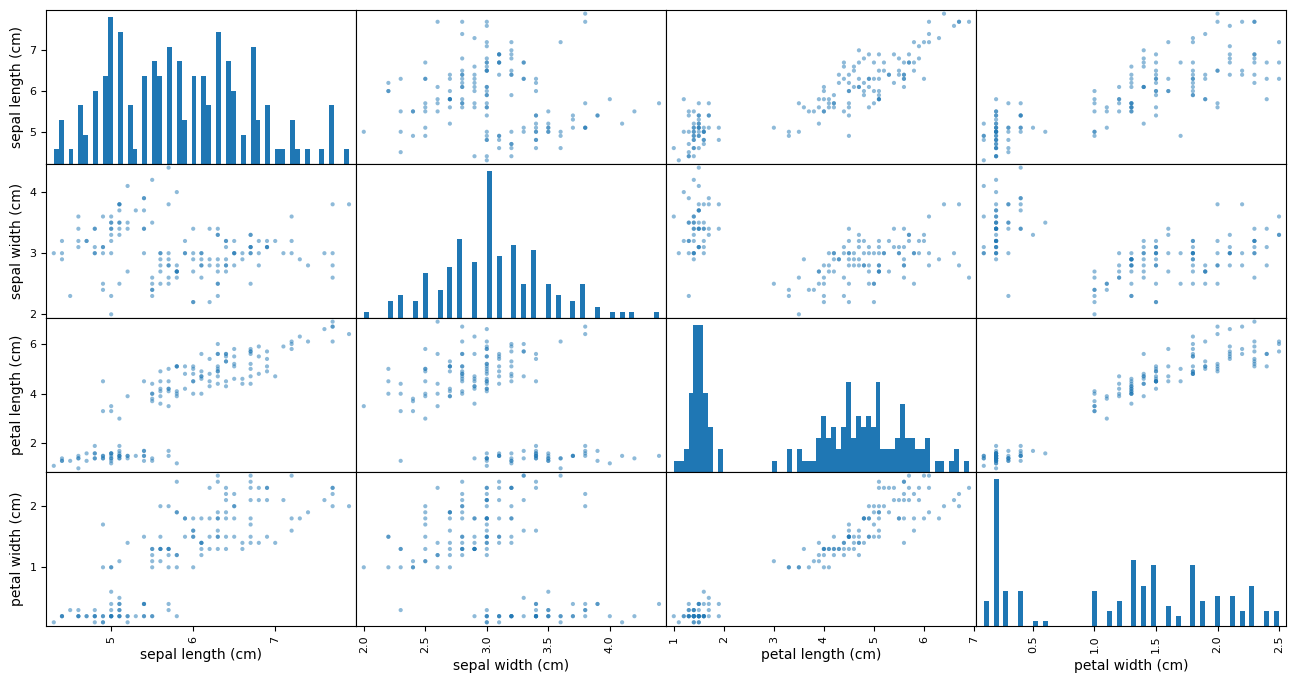

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df[iris_df.columns], figsize=(16,8), hist_kwds={'bins':60})

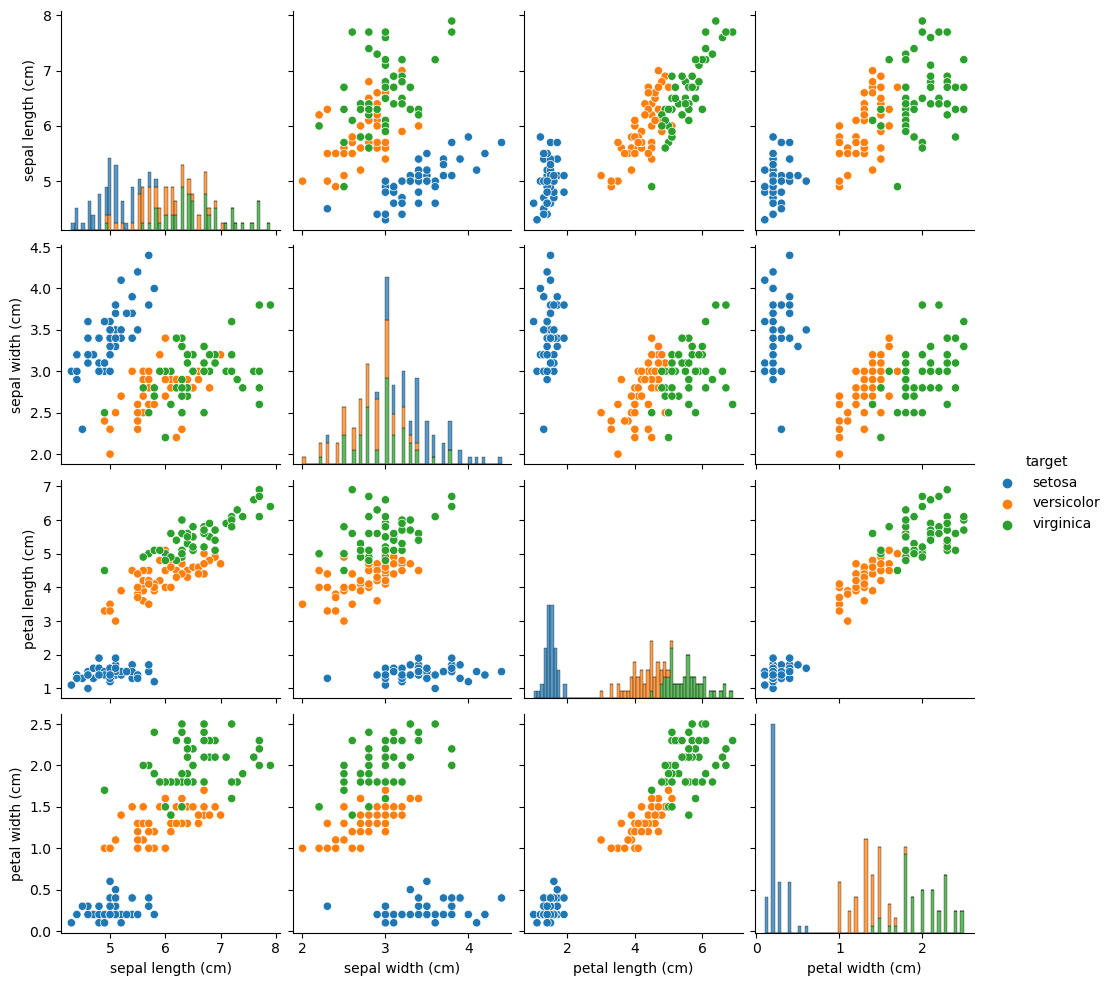

In [12]:
import seaborn as sns
sns.pairplot(iris_df, hue='target', diag_kind='hist', diag_kws={'bins': 60, 'multiple': 'stack'})

In [13]:
corr_matrix = iris_df.corr(numeric_only=True)

In [14]:
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot: >

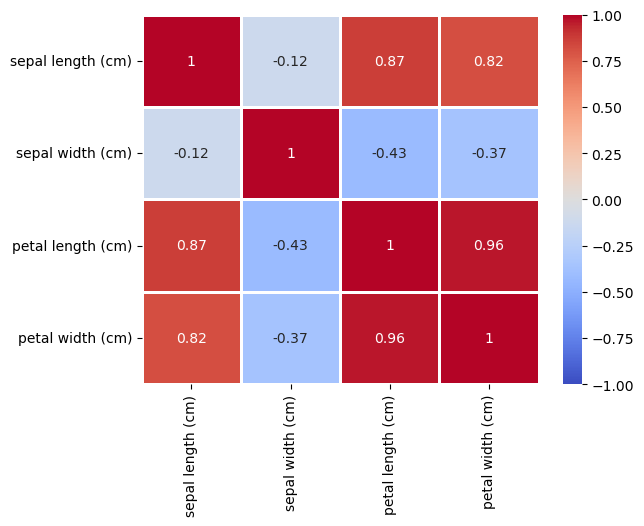

In [15]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1, linewidths=1)

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris_df, test_size=0.2, stratify = iris_df['target'], random_state=42)

In [17]:
train_set['target'].value_counts()

setosa        40
virginica     40
versicolor    40
Name: target, dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(train_set.loc[:,train_set.columns != 'target'], train_set['target'])

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
from sklearn.metrics import confusion_matrix
preds = clf.predict_proba(test_set.loc[:,test_set.columns != 'target'])
cm = confusion_matrix(test_set['target'],iris['target_names'][preds.argmax(axis=1)])

<AxesSubplot: >

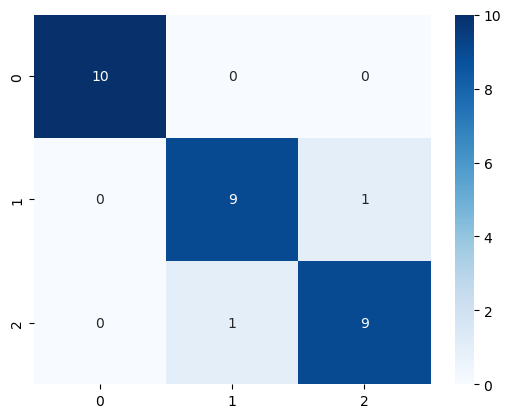

In [20]:
sns.heatmap(cm, cmap='Blues', annot=True)